# **Análise de retenção**


## **Descrição do problema**

#### Baseado nos dados da Pesquisa Etensiva do Desenvolvimento Educacional PEDE 2022, identificamos o termo "evasão" como a diferença entre o número de estudantes de uma dada idade em um ano, e o número de estudantes veteranos dessa mesma idade +1 ano no ano seguinte.

#### Segundo os elaboradores da pesquisa, os dados apresentados indicam que existe uma rotatividade na Associação, que se expressa por meio de uma taxa de evasão média de 28,5% entre 2020 e 2022. Abaixo, é possível ver o gráfico de frequência da evasão entre 2021 e 2022

## **Objetivo da Análise**

#### Fazer uma análise do perfil dos alunos que evadiram, entender características que potencialmente tem mais correlação com essa prática e identificar quais outros alunos podem evadir, para que a Passos Mágicos consiga direcionar ações mais específicas para reter por mais tempo esses alunos ao longo do tempo.



In [1]:
# Clonando o repositório para utilização neste notebook
!git clone https://github.com/pehls/gp27_techchallenge_5.git

Cloning into 'gp27_techchallenge_5'...
remote: Enumerating objects: 143, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 143 (delta 18), reused 50 (delta 16), pack-reused 89
Receiving objects: 100% (143/143), 52.35 MiB | 12.04 MiB/s, done.
Resolving deltas: 100% (29/29), done.
Updating files: 100% (105/105), done.


In [2]:
# Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/gp27_techchallenge_5/data/raw/PEDE_PASSOS_DATASET_FIAP.csv', sep=';')

In [4]:
df.head()

,INSTITUICAO_ENSINO_ALUNO_2020,NOME,IDADE_ALUNO_2020,ANOS_PM_2020,FASE_TURMA_2020,PONTO_VIRADA_2020,INDE_2020,INDE_CONCEITO_2020,PEDRA_2020,DESTAQUE_IEG_2020,...,IPP_2022,REC_AVA_1_2022,REC_AVA_2_2022,REC_AVA_3_2022,REC_AVA_4_2022,INDICADO_BOLSA_2022,PONTO_VIRADA_2022,IPV_2022,IAN_2022,NIVEL_IDEAL_2022
0,Escola Pública,ALUNO-1,11,2,2H,Não,7.883752,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,ALUNO-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.625000,Mantido na Fase + Bolsa,Mantido na Fase atual,NaN,NaN,Sim,Não,7.916665,5.0,Fase 2 (5º e 6º ano)
2,Escola Pública,ALUNO-3,12,2,3H,Não,7.856389666666666,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Escola Pública,ALUNO-4,10,2,1D,Não,5.076252,D,Quartzo,Ponto a melhorar em 2021: Melhorar a sua entre...,...,6.250000,Promovido de Fase,Mantido na Fase atual,Promovido de Fase,NaN,Não,Não,8.055553,5.0,Fase 3 (7º e 8º ano)
4,Escola Pública,ALUNO-5,10,1,2M,Não,8.077085,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,...,6.458333,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual,NaN,Não,Não,7.833337,5.0,Fase 3 (7º e 8º ano)


## **ANÁLISE EXPLORATÓRIA**

#### A primeira forma de identificar os alunos que evadiram é entender quais features temos na base.

#### Verificamos que existem dois campos, "ponto_virada" que pode nos trazer essa informação, visto que existe durante os 3 anos de dados existentes.



### Identificando alunos que evadiram

In [5]:
indicacao_evasao = ['NOME', 'PONTO_VIRADA_2020', 'PONTO_VIRADA_2021', 'PONTO_VIRADA_2022']
df_evasao = df[indicacao_evasao]

df_evasao.head()

,NOME,PONTO_VIRADA_2020,PONTO_VIRADA_2021,PONTO_VIRADA_2022
0,ALUNO-1,Não,Não,NaN
1,ALUNO-2,NaN,NaN,Não
2,ALUNO-3,Não,Não,NaN
3,ALUNO-4,Não,NaN,Não
4,ALUNO-5,Não,Não,Não


In [6]:
# Verificando quais alunos evadiram
def verifica_evadidos(row):
    if pd.isna(row['PONTO_VIRADA_2022']):  # Se PONTO_VIRADA_2022 for NaN
        return True  # O aluno evadiu
    elif pd.isna(row['PONTO_VIRADA_2020']):  # Se PONTO_VIRADA_2020 for NaN
        return False  # O aluno não evadiu
    elif pd.isna(row['PONTO_VIRADA_2021']):  # Se PONTO_VIRADA_2021 for NaN
        return True  # O aluno evadiu
    else:
        return False  # O aluno não evadiu

In [7]:
df_evasao['EVADIU'] = df_evasao.apply(verifica_evadidos, axis=1)

df_evasao.head(20)

<ipython-input-7-36242b81e214>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_evasao['EVADIU'] = df_evasao.apply(verifica_evadidos, axis=1)


,NOME,PONTO_VIRADA_2020,PONTO_VIRADA_2021,PONTO_VIRADA_2022,EVADIU
0,ALUNO-1,Não,Não,NaN,True
1,ALUNO-2,NaN,NaN,Não,False
2,ALUNO-3,Não,Não,NaN,True
3,ALUNO-4,Não,NaN,Não,True
4,ALUNO-5,Não,Não,Não,False
5,ALUNO-6,NaN,NaN,Não,False
6,ALUNO-7,NaN,NaN,Não,False
7,ALUNO-8,Sim,Não,Não,False
8,ALUNO-9,NaN,NaN,Não,False
9,ALUNO-10,Não,NaN,NaN,True


In [8]:
# Função para identificar o último ano de ponto de virada antes de NaN
def ultimo_ano(row):
    if row['EVADIU']:  # Verifica se EVADIU é verdadeiro
        if row['PONTO_VIRADA_2020'] in ['Sim', 'Não'] and pd.isna(row['PONTO_VIRADA_2021']):
            return 2020
        elif row['PONTO_VIRADA_2021'] in ['Sim', 'Não'] and pd.isna(row['PONTO_VIRADA_2022']):
            return 2021
        elif row['PONTO_VIRADA_2022'] in ['Sim', 'Não']:
            return 2022
    return pd.NA

In [9]:
# Aplicar a função para cada linha do DataFrame
df_evasao['ULTIMO_ANO'] = df_evasao.apply(ultimo_ano, axis=1)

df_evasao.head(20)

<ipython-input-9-c3fa8301b638>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_evasao['ULTIMO_ANO'] = df_evasao.apply(ultimo_ano, axis=1)


,NOME,PONTO_VIRADA_2020,PONTO_VIRADA_2021,PONTO_VIRADA_2022,EVADIU,ULTIMO_ANO
0,ALUNO-1,Não,Não,NaN,True,2021
1,ALUNO-2,NaN,NaN,Não,False,<NA>
2,ALUNO-3,Não,Não,NaN,True,2021
3,ALUNO-4,Não,NaN,Não,True,2020
4,ALUNO-5,Não,Não,Não,False,<NA>
5,ALUNO-6,NaN,NaN,Não,False,<NA>
6,ALUNO-7,NaN,NaN,Não,False,<NA>
7,ALUNO-8,Sim,Não,Não,False,<NA>
8,ALUNO-9,NaN,NaN,Não,False,<NA>
9,ALUNO-10,Não,NaN,NaN,True,2020


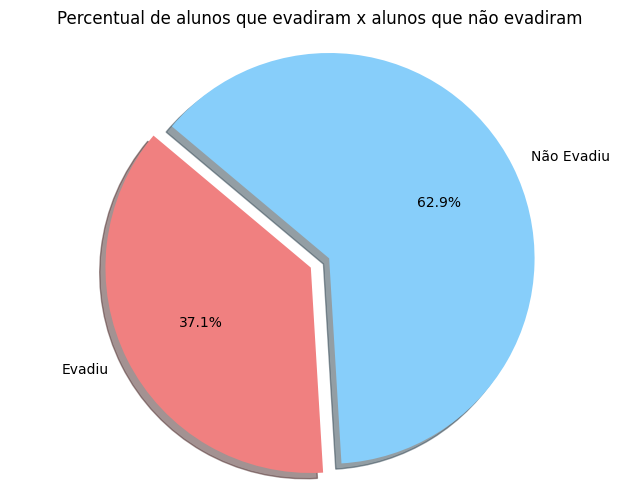

In [10]:
# Contando o número de alunos que evadiram e não evadiram
evadiu_count = df_evasao['EVADIU'].sum()
nao_evadiu_count = len(df_evasao) - evadiu_count

# Criando os rótulos e os valores para o gráfico de pizza
labels = ['Evadiu', 'Não Evadiu']
sizes = [evadiu_count, nao_evadiu_count]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice

# Criando o gráfico de setores
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Percentual de alunos que evadiram x alunos que não evadiram')
plt.axis('equal')
plt.show()

### **Estudo sobre os alunos evadidos**

#### Agora que identificamos quais alunos evadiram, vamos agrupá-los e fazer uma análise exploratória

In [11]:
# Mesclar os DataFrames com base na coluna 'NOME'
df = df.merge(df_evasao[['NOME', 'EVADIU', 'ULTIMO_ANO']], on='NOME', how='left')

# Visualizar o DataFrame combinado
print(df)

     INSTITUICAO_ENSINO_ALUNO_2020        NOME IDADE_ALUNO_2020 ANOS_PM_2020  \
0                   Escola Pública     ALUNO-1               11            2   
1                              NaN     ALUNO-2              NaN          NaN   
2                   Escola Pública     ALUNO-3               12            2   
3                   Escola Pública     ALUNO-4               10            2   
4                   Escola Pública     ALUNO-5               10            1   
...                            ...         ...              ...          ...   
1344                           NaN  ALUNO-1345              NaN          NaN   
1345                           NaN  ALUNO-1346              NaN          NaN   
1346                Escola Pública  ALUNO-1347               17            1   
1347                Escola Pública  ALUNO-1348               13            2   
1348                           NaN  ALUNO-1349              NaN          NaN   

     FASE_TURMA_2020 PONTO_VIRADA_2020 

In [12]:
# Criar um novo DataFrame contendo apenas os alunos evadidos
df_evadidos = df[df['EVADIU'] == True]

# Visualizar o novo DataFrame
df_evadidos.head()

,INSTITUICAO_ENSINO_ALUNO_2020,NOME,IDADE_ALUNO_2020,ANOS_PM_2020,FASE_TURMA_2020,PONTO_VIRADA_2020,INDE_2020,INDE_CONCEITO_2020,PEDRA_2020,DESTAQUE_IEG_2020,...,REC_AVA_2_2022,REC_AVA_3_2022,REC_AVA_4_2022,INDICADO_BOLSA_2022,PONTO_VIRADA_2022,IPV_2022,IAN_2022,NIVEL_IDEAL_2022,EVADIU,ULTIMO_ANO
0,Escola Pública,ALUNO-1,11,2,2H,Não,7.883752,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,2021
2,Escola Pública,ALUNO-3,12,2,3H,Não,7.856389666666666,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,2021
3,Escola Pública,ALUNO-4,10,2,1D,Não,5.076252,D,Quartzo,Ponto a melhorar em 2021: Melhorar a sua entre...,...,Mantido na Fase atual,Promovido de Fase,NaN,Não,Não,8.055553,5.0,Fase 3 (7º e 8º ano),True,2020
9,Escola Pública,ALUNO-10,13,1,3B,Não,5.1618745,D,Quartzo,Ponto a melhorar em 2021: Melhorar a sua entre...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,2020
11,Rede Decisão/União,ALUNO-12,14,3,3G,Não,5.838887333333334,D,Quartzo,Ponto a melhorar em 2021: Melhorar a sua entre...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,2020


In [13]:
df_evadidos.describe()

,FASE_2021,IAA_2021,IEG_2021,IPS_2021,IDA_2021,IPP_2021,IPV_2021,IAN_2021,DEFASAGEM_2021,FASE_2022,...,IEG_2022,IPS_2022,IDA_2022,NOTA_PORT_2022,NOTA_MAT_2022,NOTA_ING_2022,QTD_AVAL_2022,IPP_2022,IPV_2022,IAN_2022
count,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,13.000000,...,13.000000,13.000000,13.000000,13.000000,13.000000,5.000000,13.000000,13.000000,13.000000,13.000000
mean,2.572052,7.824454,6.160699,6.747598,4.859825,7.392576,7.003057,6.757642,-0.842795,2.615385,...,8.333235,6.875000,5.786325,5.687179,5.858974,6.360000,3.153846,6.566506,7.225428,5.961538
std,2.108942,2.456251,2.466518,1.669188,2.275143,1.287009,1.699675,2.476910,0.822759,1.609268,...,1.261132,1.325825,1.671974,2.783368,1.293871,2.948013,0.688737,1.270531,1.414558,2.401922
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.500000,-4.000000,0.000000,...,5.095109,5.000000,3.000000,0.500000,4.166667,1.833333,2.000000,4.375000,4.500005,2.500000
25%,1.000000,7.500000,4.400000,6.900000,3.200000,7.200000,6.100000,5.000000,-1.000000,2.000000,...,8.071429,5.625000,5.000000,4.000000,5.000000,6.033333,3.000000,6.250000,6.777773,5.000000
50%,2.000000,8.500000,6.300000,7.500000,5.100000,7.500000,7.200000,5.000000,-1.000000,2.000000,...,8.575000,7.500000,5.500000,5.000000,5.666667,6.666667,3.000000,6.250000,7.500000,5.000000
75%,4.000000,9.000000,8.100000,7.500000,6.600000,8.100000,8.200000,10.000000,0.000000,3.000000,...,9.166667,7.500000,6.677778,8.333333,6.500000,7.266667,4.000000,7.812500,8.000005,5.000000
max,7.000000,10.000000,10.000000,8.800000,9.000000,9.400000,10.000000,10.000000,1.000000,6.000000,...,9.691651,10.000000,9.100000,9.600000,8.600000,10.000000,4.000000,8.750000,10.000010,10.000000


In [17]:
df_evadidos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 1346
Data columns (total 71 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   INSTITUICAO_ENSINO_ALUNO_2020  414 non-null    object 
 1   NOME                           500 non-null    object 
 2   IDADE_ALUNO_2020               414 non-null    object 
 3   ANOS_PM_2020                   414 non-null    object 
 4   FASE_TURMA_2020                414 non-null    object 
 5   PONTO_VIRADA_2020              388 non-null    object 
 6   INDE_2020                      414 non-null    object 
 7   INDE_CONCEITO_2020             414 non-null    object 
 8   PEDRA_2020                     414 non-null    object 
 9   DESTAQUE_IEG_2020              414 non-null    object 
 10  DESTAQUE_IDA_2020              414 non-null    object 
 11  DESTAQUE_IPV_2020              389 non-null    object 
 12  IAA_2020                       414 non-null    ob

## ❗❗ **EM CONSTRUÇÃO** ❗❗

#### Próximos passos mapeados:

* Entender quais são as features existentes para cada ano (utilizar mesmos dados para fazer as análises de cada ano);

* Verificar a diferença de Evadiu // Último Ano;

* Análise descritiva dos dados

* Identificar a correlação da feature EVADIU com as demais em estudo;